<a href="https://colab.research.google.com/github/amainooti/Business-analysis/blob/main/BUSI650_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving finalproject_dataset_group6.csv to finalproject_dataset_group6 (4).csv
First few rows of the dataset:
   Feature1  Feature2  Feature3   Feature4
0  0.056896  9.074606  4.607973  11.895050
1 -2.092873  8.987265  5.168360   5.991266
2 -1.998360  9.110289  5.437010   7.851050
3 -0.231767  1.007090  8.009367   8.817900
4 -0.492928  6.674886  4.785915   9.554969

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  950 non-null    float64
 2   Feature3  950 non-null    float64
 3   Feature4  900 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB
None


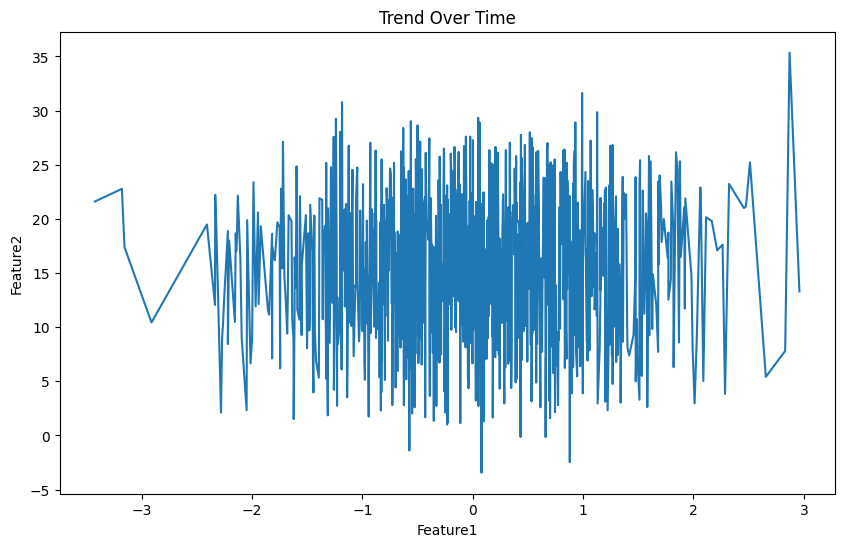


Missing values before imputation:
Feature1      0
Feature2     50
Feature3     50
Feature4    100
dtype: int64

Missing values after imputation:
Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64

Shape before removing outliers: (1000, 4)
Shape after removing outliers: (980, 4)


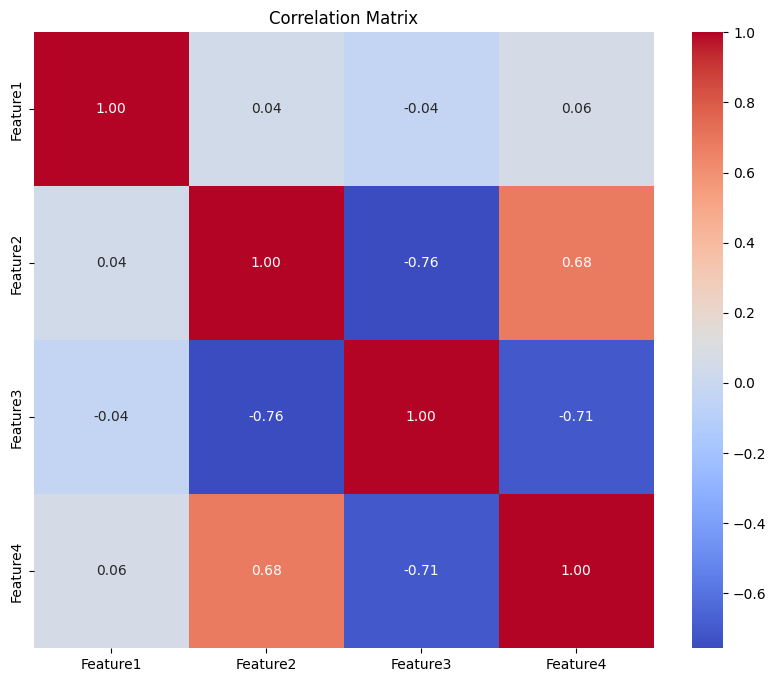

Mean Squared Error: 17.29000540985523
Root Mean Squared Error: 4.158125227774559


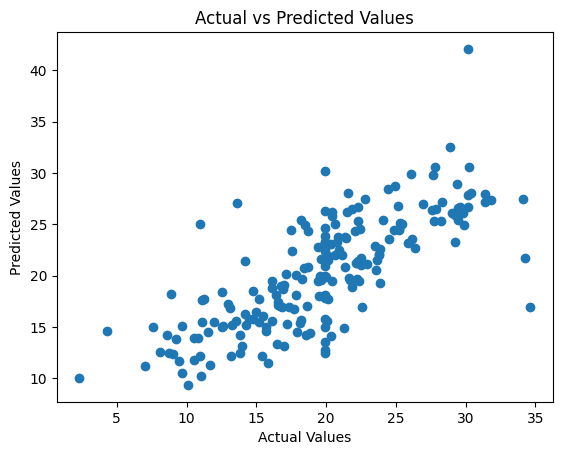

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
from google.colab import files
import io

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Read the dataset into a pandas DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Plot the data points (replace columns with your actual column names)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Feature1', y='Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Trend Over Time')
plt.show()

# Check for missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Impute missing values (replace with your preferred imputation method)
df.fillna(df.mean(), inplace=True)

# Verify that missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Identify and handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape before and after removing outliers
print("\nShape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Regression Modeling
# Assuming 'Feature1', 'Feature2', 'Feature3' as independent variables and 'Feature4' as the dependent variable
X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Feature4']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Export the cleaned dataset to a CSV file
df.to_csv('/content/cleaned_dataset.csv', index=False)
